Colunas numéricas consideradas: ['codigo_produto', 'quantidade', 'total', 'custo_medio', 'valor_desconto', 'codigo_empresa', 'dia_semana', 'mes', 'trimestre', 'media_movel_3meses']


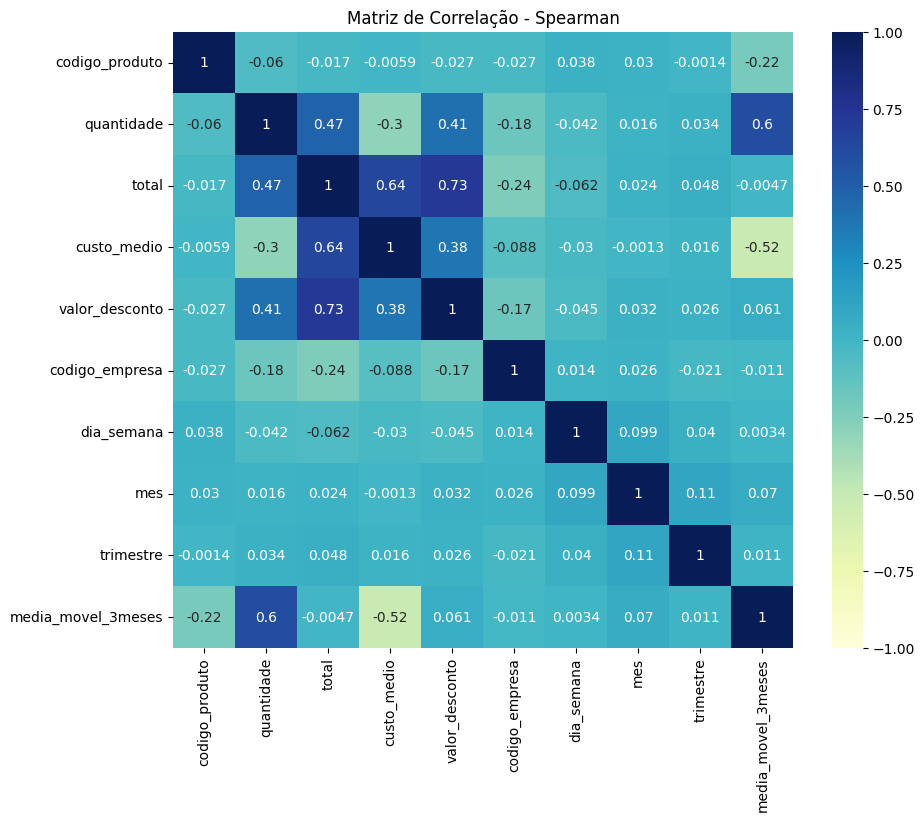


📈 Pares com correlação forte (>|0.7|):
               Var1            Var2  Correlacao  abs_corr
24           total  valor_desconto    0.725409  0.725409
42  valor_desconto           total    0.725409  0.725409

📉 Pares com correlação fraca (<=|0.3|):
                   Var1                Var2  Correlacao  abs_corr
37         custo_medio                 mes   -0.001284  0.001284
73                 mes         custo_medio   -0.001284  0.001284
80           trimestre      codigo_produto   -0.001413  0.001413
8       codigo_produto           trimestre   -0.001413  0.001413
69          dia_semana  media_movel_3meses    0.003353  0.003353
..                 ...                 ...         ...       ...
90  media_movel_3meses      codigo_produto   -0.223480  0.223480
52      codigo_empresa               total   -0.244046  0.244046
25               total      codigo_empresa   -0.244046  0.244046
13          quantidade         custo_medio   -0.297987  0.297987
31         custo_medio         

In [1]:
# 📦 Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib

# 🧠 Função utilitária
def extrair_numero(x):
    return int(''.join(filter(str.isdigit, str(x))))

# 🔗 Carregar dados
df_unidades = joblib.load('df_unidades.z')
df_produtos = joblib.load('df_produtos.z')
df_vendas = joblib.load('df_vendas.z')
df_categorias = joblib.load('df_categorias.z')

# 🏗️ Pré-processamento (exemplo)
# df_vendas['codigo'] = df_vendas['id'].apply(extrair_numero)

# 🔍 Seleção de variáveis numéricas
df_analise = df_vendas.select_dtypes(include=[np.number])

print("Colunas numéricas consideradas:", df_analise.columns.tolist())

# 🔢 Matriz de Correlação - Spearman
corr_spearman = df_analise.corr(method='spearman')

# 🔥 Heatmap Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Spearman')
plt.show()

# 🌐 Interativo
fig = px.imshow(
    corr_spearman,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Matriz de Correlação Interativa - Spearman'
)
fig.show()

# 🚩 Identificar correlações fortes (>|0.7|)
threshold = 0.7
corr_pairs = corr_spearman.unstack().reset_index()
corr_pairs.columns = ['Var1', 'Var2', 'Correlacao']
corr_pairs = corr_pairs[corr_pairs['Var1'] != corr_pairs['Var2']]
corr_pairs['abs_corr'] = corr_pairs['Correlacao'].abs()

corr_fortes = corr_pairs[corr_pairs['abs_corr'] >= threshold].sort_values(by='abs_corr', ascending=False)
print("\n📈 Pares com correlação forte (>|0.7|):\n", corr_fortes)

# 🚩 Correlações fracas (<=|0.3|)
corr_fracas = corr_pairs[corr_pairs['abs_corr'] <= 0.3].sort_values(by='abs_corr')
print("\n📉 Pares com correlação fraca (<=|0.3|):\n", corr_fracas)
